In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Задание 1
## При помощи программы «Moons», (листинг: Вариант 2, см. Приложение 1) получить исходные данные для задачи классификации: матрицу признаков X и массив целевых меток y.

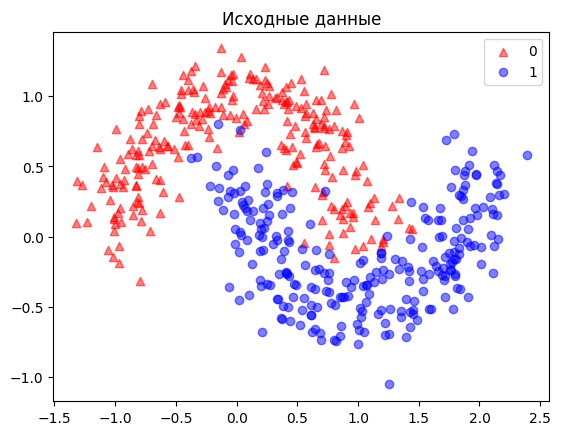

In [3]:
x, y = make_moons(n_samples=512, random_state=123, noise=0.18)
plt.figure(1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5, label='1')
plt.legend()
plt.title("Исходные данные")
plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(358, 2) (154, 2) (358,) (154,)


# Задание 2
## Создать и обучить модель классификации на основе метода опорных векторов, использующую полиномиальное ядро. Выбрать оптимальные гиперпараметры модели. Определить и вывести на печать удельные количества ошибок на обучающем и тестовом подмножествах данных. Построить график области решений при помощи функции plot_decision_regions(), разработанной ранее на практических занятиях.

In [8]:
param_grid_svm = [{'degree': np.array([2, 3, 4]),
             'C': np.logspace(-3, 3, num=8),
              'kernel': ['poly']}]

svm = SVC()
grid_svm = GridSearchCV(svm, param_grid_svm)
grid_svm.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': array([1.00000000e-03, 7.19685673e-03, 5.17947468e-02, 3.72759372e-01,
       2.68269580e+00, 1.93069773e+01, 1.38949549e+02, 1.00000000e+03]),
                          'degree': array([2, 3, 4]), 'kernel': ['poly']}])

In [9]:
best_params = grid_svm.best_params_
print('\n best_params=', best_params)


 best_params= {'C': 2.6826957952797246, 'degree': 3, 'kernel': 'poly'}


In [10]:
print(f'''Удельное количество ошибок на обучающем наборе: {np.mean(y_train != grid_svm.best_estimator_.predict(x_train))}
Удельное количество ошибок на тестовом наборе: {np.mean(y_test != grid_svm.best_estimator_.predict(x_test))}''')

Удельное количество ошибок на обучающем наборе: 0.10614525139664804
Удельное количество ошибок на тестовом наборе: 0.07792207792207792


In [11]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # Настройка генератора маркеров и палитры
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Построение графика поверхности решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Отобразить образцы классов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], edgecolor='black', marker=markers[idx], label=cl)

<ipython-input-11-4b0309923b32>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,


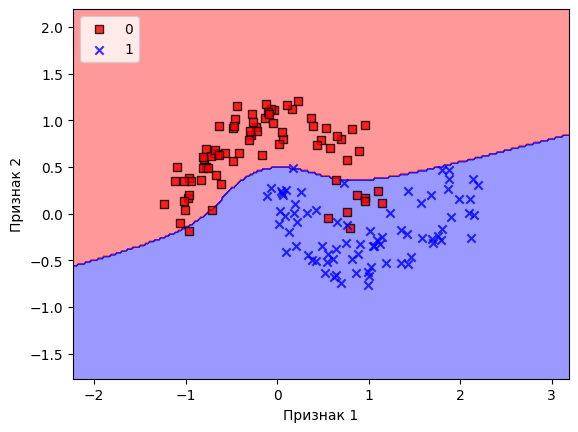

In [12]:
plot_decision_regions(x_test, y_test, classifier=grid_svm.best_estimator_)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend(loc='upper left')
plt.show()

# Задание 3
## Создать и обучить модель классификации «Случайный лес». Выбрать оптимальные гиперпараметры модели. Определить и вывести на печать удельные количества ошибок на обучающем и тестовом подмножествах данных. Построить график области решений при помощи функции plot_decision_regions(), разработанной ранее на практических занятиях.

In [13]:
param_grid_rf = {'max_depth': [2, 3, 5, 7, 10],
                 'min_samples_split': [2, 3, 5, 7, 10]}

rf = RandomForestClassifier()

grid_rf = GridSearchCV(rf, param_grid_rf)
grid_rf.fit(x_train, y_train)

best_params = grid_rf.best_params_
print('\n best_params=', best_params)


 best_params= {'max_depth': 10, 'min_samples_split': 5}


In [14]:
print(f'''Удельное количество ошибок на обучающем наборе: {np.mean(y_train != grid_rf.best_estimator_.predict(x_train))}
Удельное количество ошибок на тестовом наборе: {np.mean(y_test != grid_rf.best_estimator_.predict(x_test))}''')

Удельное количество ошибок на обучающем наборе: 0.0
Удельное количество ошибок на тестовом наборе: 0.03896103896103896


<ipython-input-11-4b0309923b32>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,


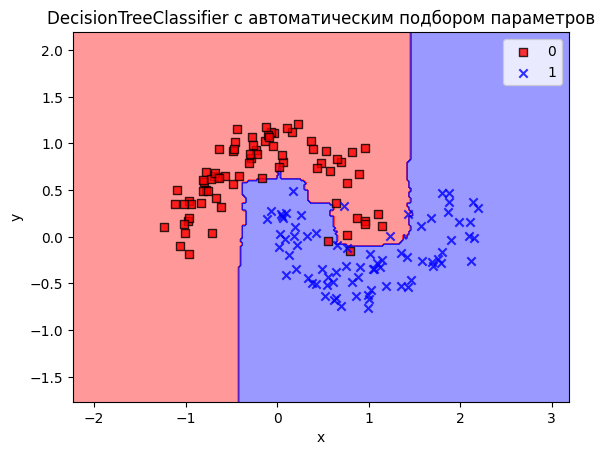

In [15]:
plot_decision_regions(x_test, y_test, grid_rf.best_estimator_)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('DecisionTreeClassifier с автоматическим подбором параметров')
plt.show()

# Задание 4
## Сравнить качество исследуемых моделей классификации.


In [17]:
print(accuracy_score(y_test, grid_svm.best_estimator_.predict(x_test)))
print(accuracy_score(y_test, grid_rf.best_estimator_.predict(x_test)))

0.922077922077922
0.961038961038961


## В ходе лабораторной работы были обучены 2 вида моделей: модель метода опорных векторов и Случайный лес.

## По итогам были получены следующие результаты на тестовой выборке:

## Метод опорных векторов:

## accuracy = 92.2%

## Модель дерева решений:

## accuracy = 96.1%

## Модели показали высокий результат